In [ ]:
import pandas as pd
import numpy as np
import random
import os
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('/Users/nehashaikh/Desktop/banksim_reduced.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer             2144 non-null   object 
 1   SSN                  2144 non-null   int64  
 2   Address              2144 non-null   object 
 3   Zip_Code             2144 non-null   int64  
 4   Mobile_number        2144 non-null   object 
 5   Financial_Institute  2144 non-null   int64  
 6   fraud                2144 non-null   int64  
 7   age                  2144 non-null   object 
 8   gender               2144 non-null   object 
 9   merchant             2144 non-null   object 
 10  category             2144 non-null   object 
 11  amount               2144 non-null   float64
 12  order_ID             2144 non-null   int64  
 13  Transaction_ID       2144 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 234.6+ KB


In [ ]:
df.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [ ]:
x = random.sample(range(345671,1190722),594643)
y = random.sample(range(111111111, 999999999),594643)
z = random.sample(range(110368,1190722),594643)

In [ ]:
df.insert(10,"order ID",x)
df.insert(11, 'SSN',y)
df.insert(12,"Transaction ID",z)

In [ ]:
df.shape

(594643, 13)

In [ ]:
df.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,order ID,SSN,Transaction ID
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0,373259,998686671,793642
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0,422971,682719132,829578
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0,434966,846560879,936309
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0,773069,766094386,657543
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0,708330,356909645,722468


In [ ]:
df['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


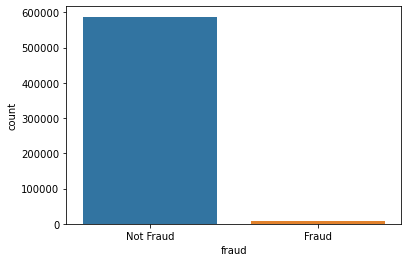

In [ ]:
# visualize the target variable
g = sns.countplot(df['fraud'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [ ]:
#class count
class_count_0, class_count_1 = df['fraud'].value_counts()

#Separate class
class_0 = df[df['fraud'] == 0]
class_1 = df[df['fraud'] == 1]

print('class 0: ', class_0.shape)
print('class 1: ', class_1.shape)

class 0:  (587443, 13)
class 1:  (7200, 13)


total class of 1 and 0:
 0    7200
1    7200
Name: fraud, dtype: int64


<AxesSubplot:title={'center':'count(target)'}>

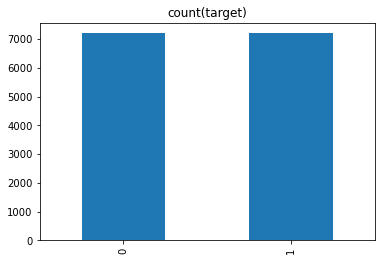

In [ ]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis =0)

print("total class of 1 and 0:\n", test_under['fraud'].value_counts())

#plot the new under sampling data
test_under['fraud'].value_counts().plot(kind = 'bar', title='count(target)')

In [ ]:
test_under.reset_index()

,index,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,order ID,SSN,Transaction ID
0,121156,43,'C2132932756','3','M','28007','M348934600','28007','es_transportation',51.81,0,699956,840676111,837961
1,53725,20,'C260437492','3','F','28007','M151143676','28007','es_barsandrestaurants',24.01,0,740505,248460134,1112553
2,272107,90,'C379301962','3','F','28007','M1823072687','28007','es_transportation',14.50,0,609165,531592250,935219
3,260530,87,'C2119675022','6','F','28007','M1823072687','28007','es_transportation',0.87,0,943245,722354417,209556
4,196574,67,'C1489836575','2','F','28007','M85975013','28007','es_food',40.38,0,500536,926176124,233832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,593928,179,'C2138532527','5','M','28007','M3697346','28007','es_leisure',192.78,1,830548,872592265,1042537
14396,594025,179,'C644541754','5','F','28007','M1748431652','28007','es_wellnessandbeauty',42.37,1,1072720,847035047,1105827
14397,594026,179,'C245117318','3','F','28007','M1748431652','28007','es_wellnessandbeauty',521.84,1,409882,549470668,726948
14398,594168,179,'C1239184141','2','F','28007','M209847108','28007','es_wellnessandbeauty',25.29,1,803357,139703248,826082


In [ ]:
df_new = test_under.drop(["step"], axis=1)

In [ ]:
#List of customers to duplicate records
List = test_under.sample(n = 1000, replace=True)
List.fraud.value_counts()

0    519
1    481
Name: fraud, dtype: int64

In [ ]:
rand_list = random.sample(range(111111111, 999999999), 10)
print(rand_list)

for i in range(test_under.size):
    test_under['Financial Institute'] = np.random.choice(rand_list,14400)

test_under

[492736278, 872720301, 589512164, 847374404, 695411241, 305626928, 667440061, 870350487, 354523537, 142064275]


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,order ID,SSN,Transaction ID,Financial Institute
121156,43,'C2132932756','3','M','28007','M348934600','28007','es_transportation',51.81,0,699956,840676111,837961,667440061
53725,20,'C260437492','3','F','28007','M151143676','28007','es_barsandrestaurants',24.01,0,740505,248460134,1112553,589512164
272107,90,'C379301962','3','F','28007','M1823072687','28007','es_transportation',14.50,0,609165,531592250,935219,667440061
260530,87,'C2119675022','6','F','28007','M1823072687','28007','es_transportation',0.87,0,943245,722354417,209556,695411241
196574,67,'C1489836575','2','F','28007','M85975013','28007','es_food',40.38,0,500536,926176124,233832,589512164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593928,179,'C2138532527','5','M','28007','M3697346','28007','es_leisure',192.78,1,830548,872592265,1042537,492736278
594025,179,'C644541754','5','F','28007','M1748431652','28007','es_wellnessandbeauty',42.37,1,1072720,847035047,1105827,695411241
594026,179,'C245117318','3','F','28007','M1748431652','28007','es_wellnessandbeauty',521.84,1,409882,549470668,726948,872720301
594168,179,'C1239184141','2','F','28007','M209847108','28007','es_wellnessandbeauty',25.29,1,803357,139703248,826082,492736278


In [ ]:
test_under.to_csv("banksimfinal.csv", index=False)

In [ ]:
df_new

In [ ]:
df1 = df_new

In [ ]:
df1.drop(columns = ['zipcodeOri','zipMerchant','order ID','financial Institution','Transaction ID'], inplace=True)

In [ ]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

NameError: name 'df1' is not defined

In [ ]:
enc = OrdinalEncoder()
X = enc.fit_transform(X)

NameError: name 'X' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test))

y_ptrain = rf.predict(X_train)
print(accuracy_score(y_ptrain,y_train),f1_score(y_ptrain,y_train))

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test))

y_ptrain = knn.predict(X_train)
print(accuracy_score(y_ptrain,y_train),f1_score(y_ptrain,y_train))

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test))

y_ptrain = knn.predict(X_train)
print(accuracy_score(y_ptrain,y_train),f1_score(y_ptrain,y_train))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
kmeans = KMeans(2)
kmeans.fit(X_train)
y_pre = kmeans.predict(X_test)

accuracy_score(y_pre,y_test)

In [ ]:
clf = LocalOutlierFactor(n_neighbors=2,novelty=True)
clf.fit(X_train)

pred = clf.predict(X_test)

